In [0]:
"/content/drive/My Drive/Colab Notebooks/from.ipynb"

In [0]:
from imutils.perspective import four_point_transform
from google.colab.patches import cv2_imshow
from imutils import contours
import numpy as np
import imutils
import cv2
#------------------------------------------Circles--------------------------------------------------------------------
im = cv2.imread("/content/drive/My Drive/FormProcessing/sample_forms/test1.png")
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray, 200, 255,cv2.THRESH_BINARY)
cimg = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

c = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT,1, 15, param1=50, param2=14, minRadius=5,maxRadius=10)
c = np.uint16(np.around(c))


for i in c[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
print(c)

#--------------------------------------------Rectangles------------------------------------------------------------------

blurred = cv2.GaussianBlur(gray, (1, 11), 0)
thresholded = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19, 2)
contours, hierarchy = cv2.findContours(
    thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#e = cv2.erode(img,kernel,iterations = 2)  
#d = cv2.dilate(e,kernel,iterations = 1)

rects = []
peris = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w*h>50 and w>5 and h>5 and w*h<50000:
      peri = cv2.arcLength(c, True)
      peris.append(peri)
      approx = cv2.approxPolyDP(c, 0.02 * peri, True)
      # check if the approximated contour has four points
      # if so, it can be labelled as a rectangle
      if len(approx) == 4:
              rects.append(approx)
#print(contours)
contoured = cv2.drawContours(cimg, rects, -1, (255, 0, 0), 3)
#--------------------------------------------------------------------------------------------------------------------------


#cv2_imshow(cimg)

[[[ 140 1378    6]
  [ 584 1324    6]
  [ 672 1324    6]
  [ 778 1324    6]
  [ 846 1356    6]
  [ 918 1356    6]
  [1006 1116    8]
  [1006 1094    7]
  [ 206 1356    6]
  [ 340 1378    6]
  [ 654 1378    6]
  [ 730 1378    6]
  [1066 1150    7]
  [ 488  676    6]
  [ 442 1324    6]
  [1006 1196    8]
  [1068  416    7]
  [ 240 1378    6]
  [ 694 1356    6]
  [ 764 1356    6]
  [ 846 1324    6]
  [ 892 1378    6]
  [1066  530    8]
  [ 658  892    7]
  [1006  756    7]
  [1034  214    7]
  [ 364 1324    6]
  [1022 1356    6]
  [ 520  624    9]
  [ 948  214    9]
  [ 390 1292    8]
  [ 400  390    8]
  [ 430  216    8]
  [1006  416    8]
  [1066  756    8]
  [ 458 1356    6]
  [ 578  624    9]
  [  40  806    8]
  [ 370  216    8]
  [ 456  676    8]
  [1006 1150    8]
  [ 268 1356    6]
  [ 428  392    6]
  [1006  728    8]
  [1066 1094    8]
  [1068 1116    8]
  [ 322  806    7]
  [  42  674    8]
  [1066 1198    8]
  [ 330 1292    7]
  [1068  728    7]
  [ 916   44    8]
  [1006  532

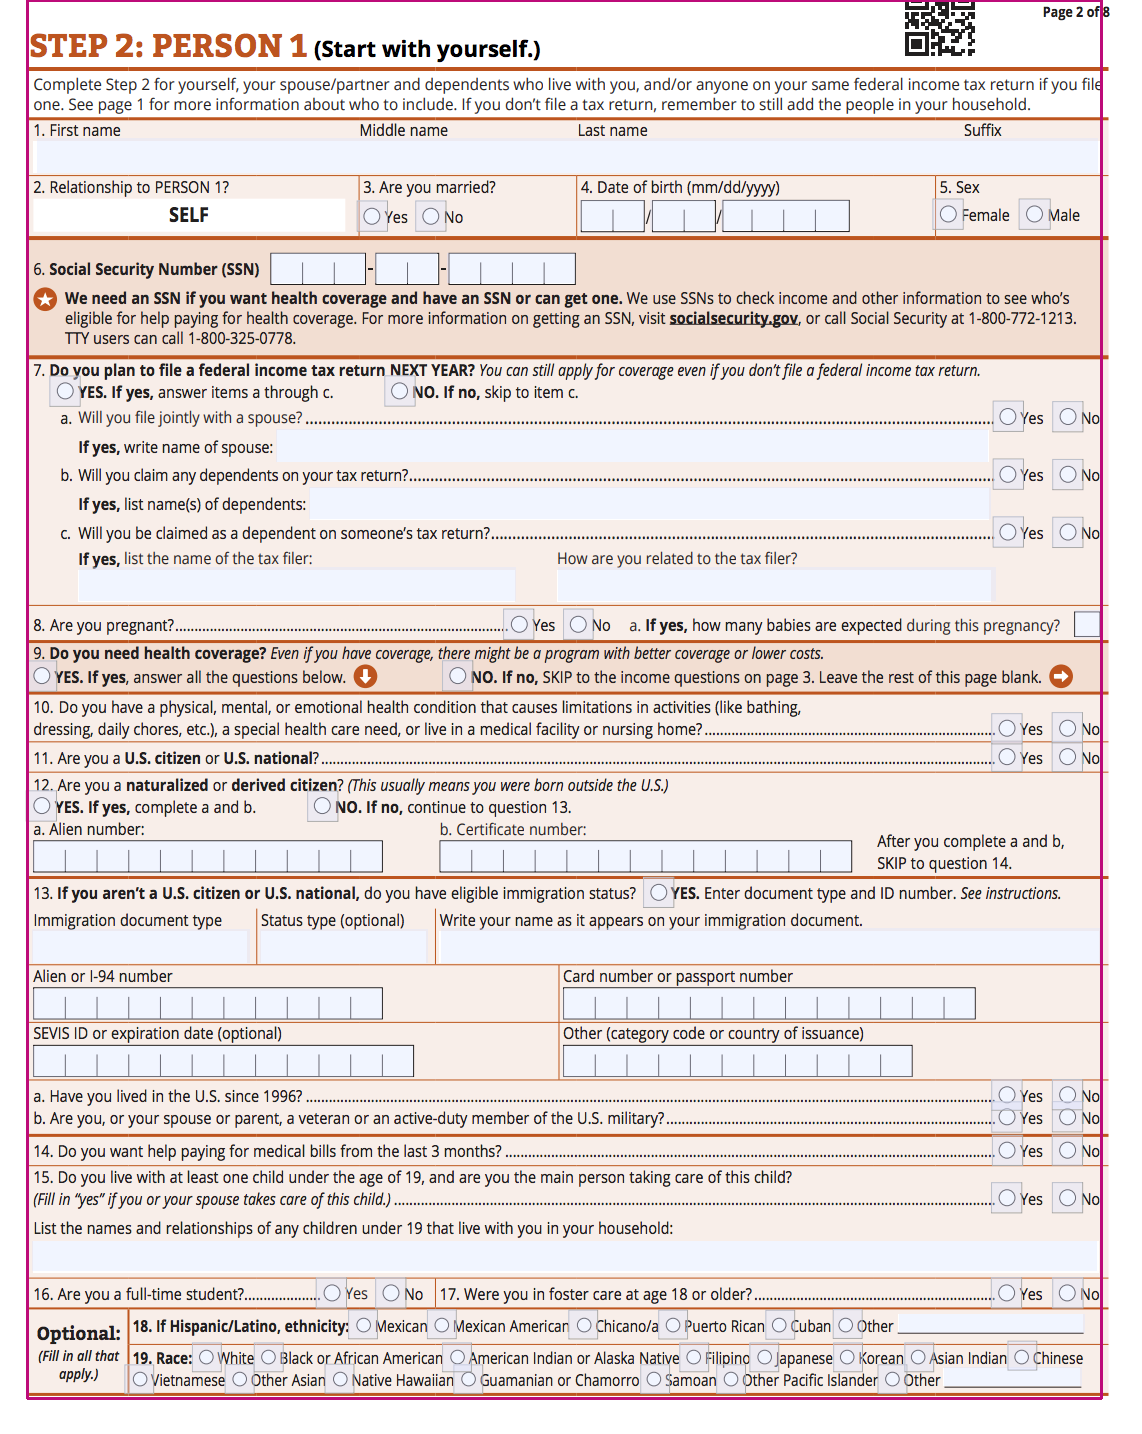

In [0]:
import cv2
import numpy as np

image = cv2.imread('/content/drive/My Drive/FormProcessing/sample_forms/test1.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

cnts, _ = cv2.findContours(img_dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Array of initial bounding rects
rects = []

# Bool array indicating which initial bounding rect has
# already been used
rectsUsed = []

# Just initialize bounding rects and set all bools to false
for cnt in cnts:
    rects.append(cv2.boundingRect(cnt))
    rectsUsed.append(False)

# Sort bounding rects by x coordinate
def getXFromRect(item):
    return item[0]

rects.sort(key = getXFromRect)

# Array of accepted rects
acceptedRects = []

# Merge threshold for x coordinate distance
xThr = 5

# Iterate all initial bounding rects
for supIdx, supVal in enumerate(rects):
    if (rectsUsed[supIdx] == False):

        # Initialize current rect
        currxMin = supVal[0]
        currxMax = supVal[0] + supVal[2]
        curryMin = supVal[1]
        curryMax = supVal[1] + supVal[3]

        # This bounding rect is used
        rectsUsed[supIdx] = True

        # Iterate all initial bounding rects
        # starting from the next
        for subIdx, subVal in enumerate(rects[(supIdx+1):], start = (supIdx+1)):

            # Initialize merge candidate
            candxMin = subVal[0]
            candxMax = subVal[0] + subVal[2]
            candyMin = subVal[1]
            candyMax = subVal[1] + subVal[3]

            # Check if x distance between current rect
            # and merge candidate is small enough
            if (candxMin <= currxMax + xThr):

                # Reset coordinates of current rect
                currxMax = candxMax
                curryMin = min(curryMin, candyMin)
                curryMax = max(curryMax, candyMax)

                # Merge candidate (bounding rect) is used
                rectsUsed[subIdx] = True
            else:
                break

        # No more merge candidates possible, accept current rect
        acceptedRects.append([currxMin, curryMin, currxMax - currxMin, curryMax - curryMin])

for rect in acceptedRects:
    img = cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (121, 11, 189), 2)


cv2_imshow(img)

In [1]:
import numpy as np
import cv2
import pytesseract
from PIL import Image
from google.colab.patches import cv2_imshow

#image = Image.open("formexample.png")
#width,height = image.size
#image = image.resize((width*1//2 ,height*1//2 ), Image.ANTIALIAS) 
#rgb_im = image.convert('RGB') 
#quality_val = 90
#rgb_im.save('modified.jpg', quality=quality_val)

large = cv2.imread('/content/drive/My Drive/FormProcessing/sample_forms/test.jpeg')
h = large.shape[0]
w = large.shape[1]
h = h*1/2
w = w*1/2
rgb = cv2.resize(large, (int(w), int(h)) )
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel = np.ones((5, 5), np.uint8)
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,5))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#For opencv 3+ comment the previous line and uncomment the following line
#_, contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

mask = np.zeros(bw.shape, dtype=np.uint8)
count=0
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if True :#r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(rgb, (x-1, y-1), (x+w-1, y+h-1), (0, 255, 0), 2)
        new_img = rgb[y:y+h, x:x+w]
        cv2.medianBlur(new_img,9)
        cv2.threshold(new_img, 0, 255, cv2.THRESH_BINARY )
        kernel = np.ones((1,9),np.uint8) 
        cv2.morphologyEx(new_img, cv2.MORPH_OPEN, kernel)
        cv2.Canny(new_img, 100, 200)
        new_img = cv2.resize(new_img, None, fx=5.5, fy=4.5, interpolation=cv2.INTER_CUBIC)
        # text = pytesseract.image_to_string(new_img)
        # if text!="" and text!=" ":
        #     count+=1;
        #     print('field '+str(count)+') '+text)
        #     print("\n")


cv2_imshow(rgb)
cv2.waitKey(0)

ModuleNotFoundError: ignored

In [2]:
!pip install pytesseract
!sudo apt install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13431 sha256=23048dd78e20628b366fe7a330d2968142e5b6cb0ad9d15b7f26ebeff824363e
  Stored in directory: /root/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [0]:
import json

class field:
  def __init__(self, txt=None,txtrect=(-1,-1,-1,-1),ftype=None):
    self.txt=txt
    self.txtrect=txtrect
    self.ftype=ftype
    self.struct={"ftype":None,"ftxt":txt,"txtrect":tuple(txtrect),"fradius":0,"fcenter":tuple((-1,-1)),"fboundingBox":tuple((-1,-1,-1,-1))}

  def printJson(self):
    print(json.dumps(self.struct,indent = 4))

class radio:
  def __init__(self, pos=(-1,-1,-1)):
    self.pos=pos
    self.fname="radio"

class date:
  def __init__(self, bbox=(-1,-1,-1,-1)):
    self.bbox=bbox
    self.fname="date"

class textField:
  def __init__(self, bbox=(-1,-1,-1,-1)):
    self.bbox=bbox
    self.fname="textField"

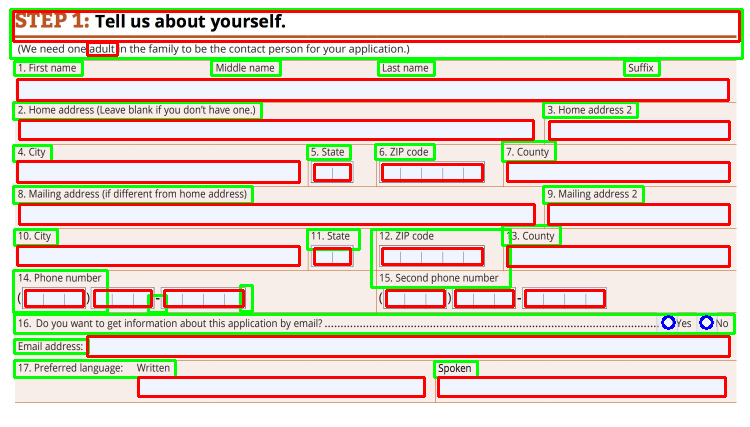

In [12]:
import numpy as np
import cv2
import pytesseract
from PIL import Image
from google.colab.patches import cv2_imshow

large = cv2.imread('/content/drive/My Drive/FormProcessing/sample_forms/test.jpeg')
h = large.shape[0]
w = large.shape[1]
h = h*1/2
w = w*1/2
rgb = cv2.resize(large, (int(w), int(h)) )
#rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel = np.ones((7,12), np.uint8)
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#k = 4 or 5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,4))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros(bw.shape, dtype=np.uint8)
count=0
fields=[]
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(rgb, (x-1, y-1), (x+w-1, y+h-1), (0, 255, 0), 2)
        new_img = rgb[y:y+h, x:x+w]
        cv2.medianBlur(new_img,9)
        cv2.threshold(new_img, 0, 255, cv2.THRESH_BINARY )
        kernel = np.ones((1,9),np.uint8) 
        cv2.morphologyEx(new_img, cv2.MORPH_OPEN, kernel)
        cv2.Canny(new_img, 100, 200)
        new_img = cv2.resize(new_img, None, fx=5.5, fy=4.5, interpolation=cv2.INTER_CUBIC)
        text = pytesseract.image_to_string(new_img)
        if text!="" and text!=" ":
            fields.append(field(text,(x,y,w,h)))
            # count+=1;
            # print('field '+str(count)+') '+text)
            # print("\n")

ret,thresh = cv2.threshold(small, 200, 255,cv2.THRESH_BINARY)

c = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT,1, 15, param1=50, param2=14, minRadius=5,maxRadius=10)
c = np.uint16(np.around(c))

res1=rgb.copy()
for i in c[0,:]:
    # draw the outer circle
    cv2.circle(res1,(i[0],i[1]),i[2],(255,0,0),2)

#cv2_imshow(res1)


blurred = cv2.GaussianBlur(small, (5,5), 0)
ret,thresh1 = cv2.threshold(blurred,244,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(
    thresh1, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)


rects = []

res2=res1.copy()

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w*h>50 and w>5 and h>5 and w*h<thresh1.shape[0]*thresh1.shape[1]*0.5:
      
      peri = cv2.arcLength(c, True)
      approx = cv2.approxPolyDP(c, 0.005 * peri,False)
      # check if the approximated contour has four points
      # if so, it can be labelled as a rectangle
      if len(approx) <25:
        rects.append([x,y,w,h])
        cv2.rectangle(res2,(x,y),(x+w,y+h), (0,0,255), 2)



cv2_imshow(res2)



In [0]:
textfields.sort(key=lambda x: (x.txtrect[1],x.txtrect[0]))
for f in textfields:
  f.printJson()
  print()

{
    "ftype": null,
    "ftxt": "STEP 1: Tell us about yourself.\n\n \n\n(We need one adult in the family to be the contact person for your application.)",
    "txtrect": [
        11,
        10,
        732,
        49
    ],
    "fradius": 0,
    "fcenter": [
        -1,
        -1
    ],
    "fboundingBox": [
        -1,
        -1,
        -1,
        -1
    ]
}

{
    "ftype": null,
    "ftxt": "Middle name",
    "txtrect": [
        212,
        61,
        69,
        15
    ],
    "fradius": 0,
    "fcenter": [
        -1,
        -1
    ],
    "fboundingBox": [
        -1,
        -1,
        -1,
        -1
    ]
}

{
    "ftype": null,
    "ftxt": "Suffix",
    "txtrect": [
        625,
        61,
        35,
        15
    ],
    "fradius": 0,
    "fcenter": [
        -1,
        -1
    ],
    "fboundingBox": [
        -1,
        -1,
        -1,
        -1
    ]
}

{
    "ftype": null,
    "ftxt": "1. First name",
    "txtrect": [
        15,
        62,
        68,
    

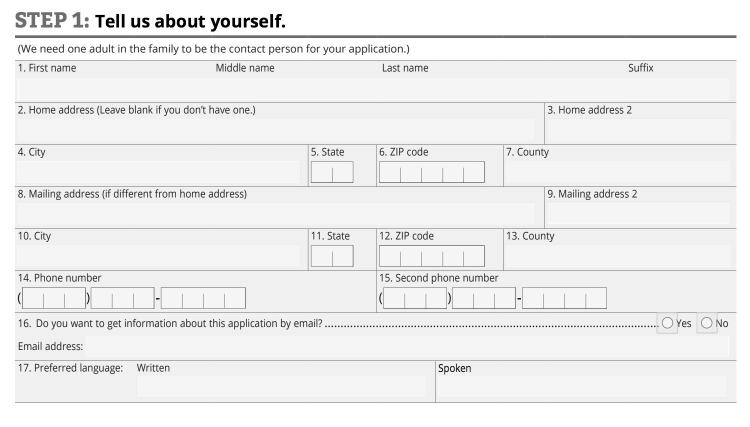

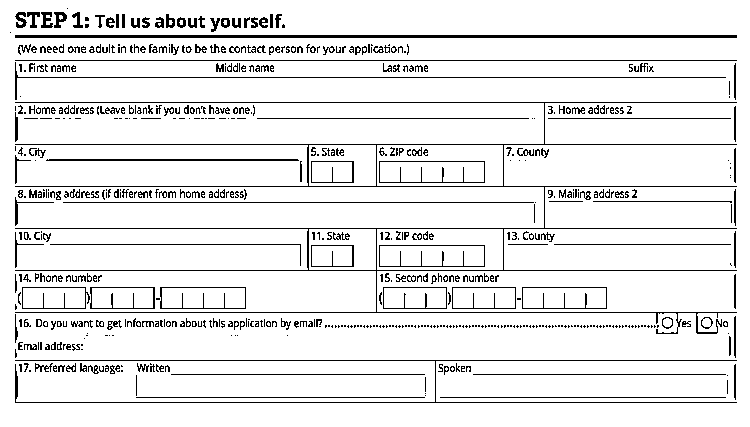

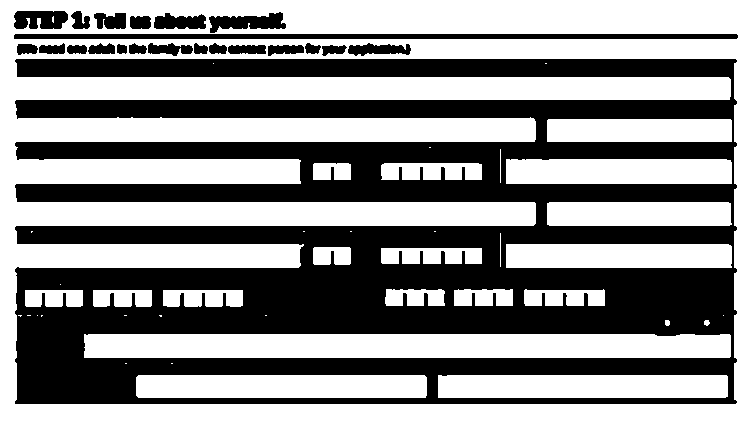

In [16]:

adthresh = cv2.adaptiveThreshold(small,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
cv2_imshow(small)
cv2_imshow(adthresh)
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# cl1 = clahe.apply(small)
# cv2_imshow(cl1)
# blurred = cv2.GaussianBlur(cl1, (5,5), 0)
# adthresh = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv2.THRESH_BINARY,11,2)
# ret, otsu = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# cv2_imshow(adthresh)
# cv2_imshow(otsu)
# rgb = cv2.imread('/content/drive/My Drive/FormProcessing/sample_forms/test.jpeg')
# small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(small, (5,5), 0)
ret,thresh1 = cv2.threshold(blurred,240,255,cv2.THRESH_BINARY)

cv2_imshow(thresh1)

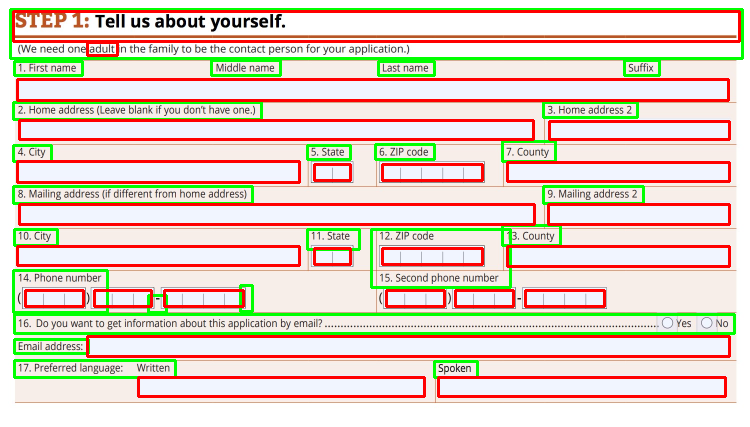

In [14]:


contours, hierarchy = cv2.findContours(
    thresh1, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)


res2=rgb.copy()
rects = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w*h>50 and w>5 and h>5 and w*h<thresh1.shape[0]*thresh1.shape[1]*0.5:
      
      peri = cv2.arcLength(c, True)
      approx = cv2.approxPolyDP(c, 0.005 * peri,False)
      # check if the approximated contour has four points
      # if so, it can be labelled as a rectangle
      if len(approx) <25:
        rects.append((x,y,w,h))
        cv2.rectangle(res2,(x,y),(x+w,y+h), (0,0,255), 2)
        #rects.append(approx)


#cv2.drawContours(res2, rects, -1, (0, 0, 255), 2)


cv2_imshow(res2)

In [0]:
fields.sort(key=lambda x:( x.txtrect[1] , x.txtrect[0]))
rects.sort(key=lambda x: (x[1] , x[0]))

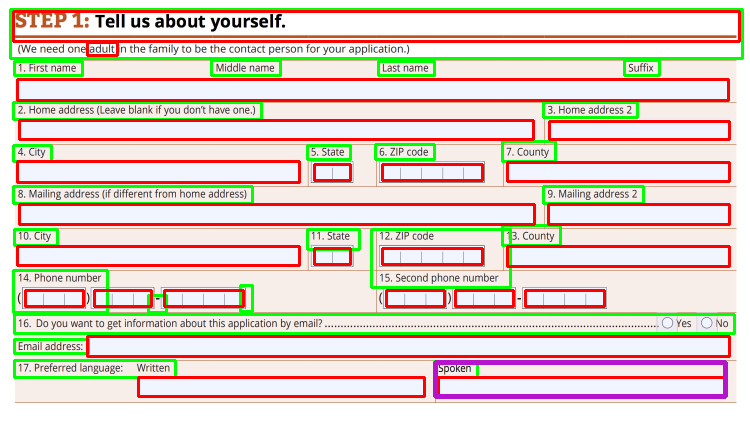

1


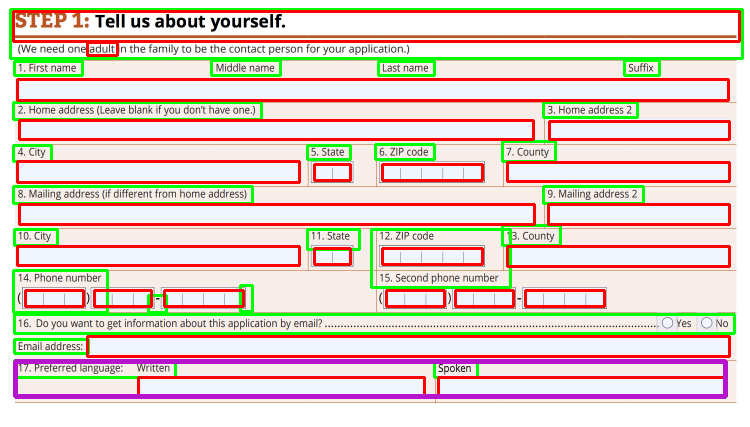

1


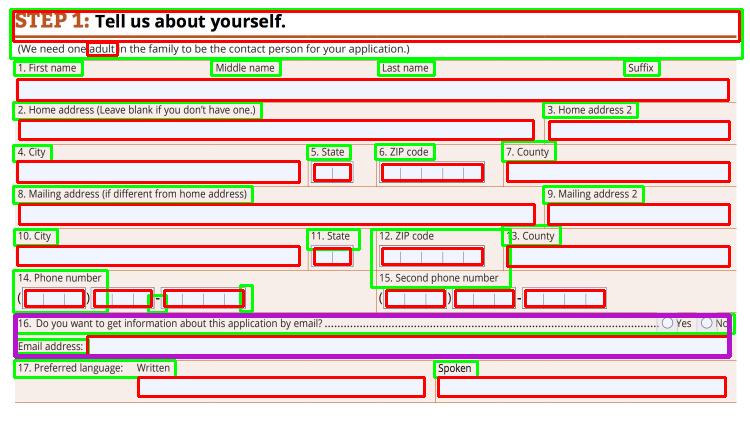

2


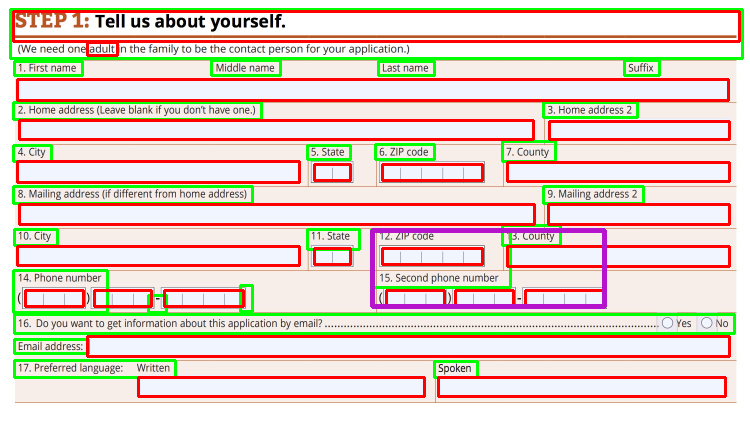

2


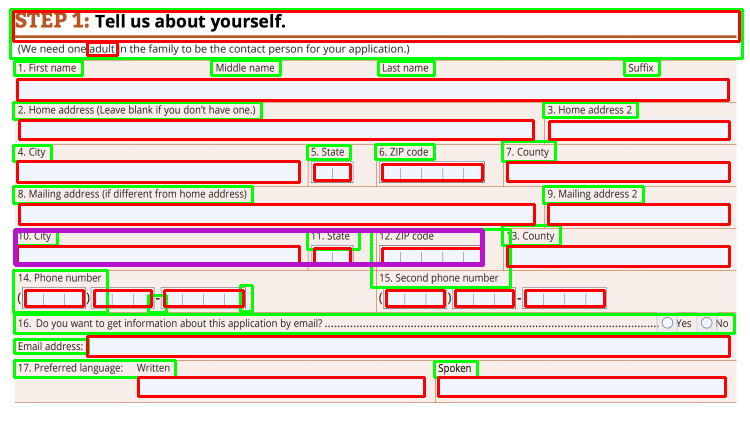

2


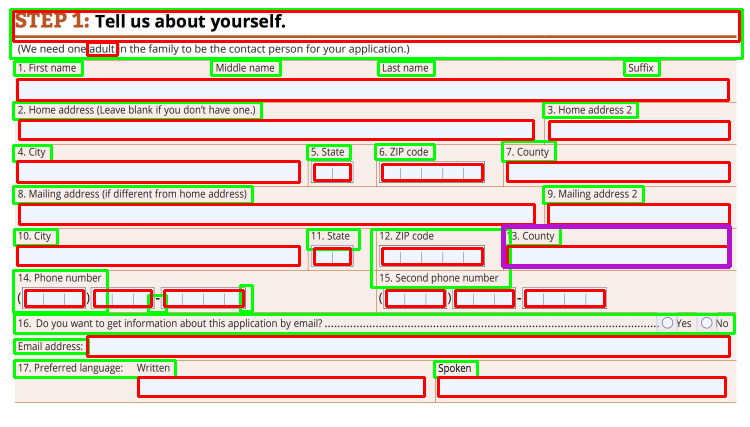

0


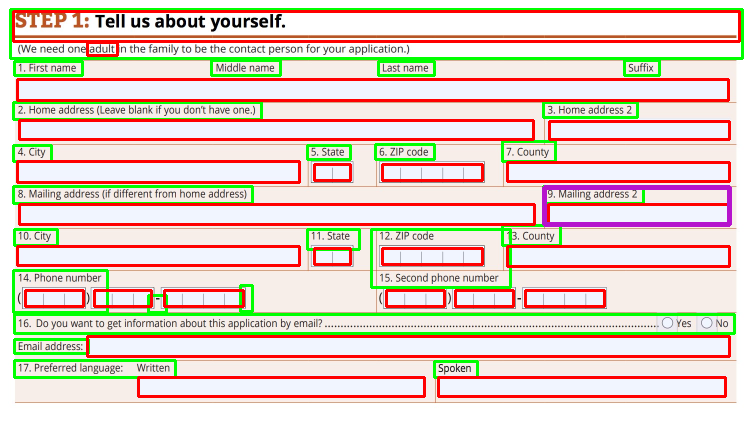

0


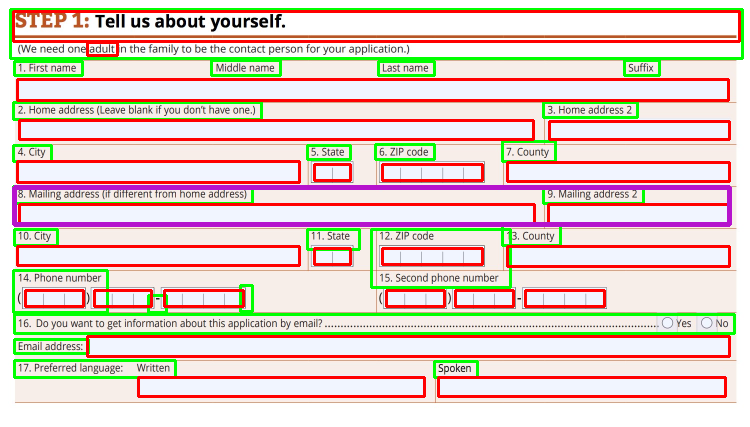

0


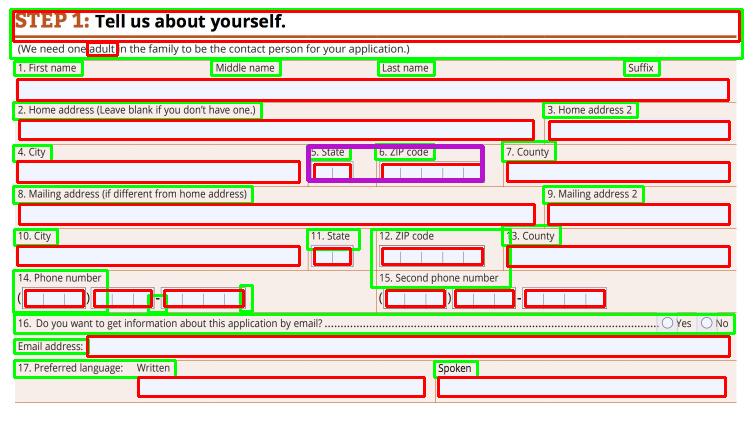

4


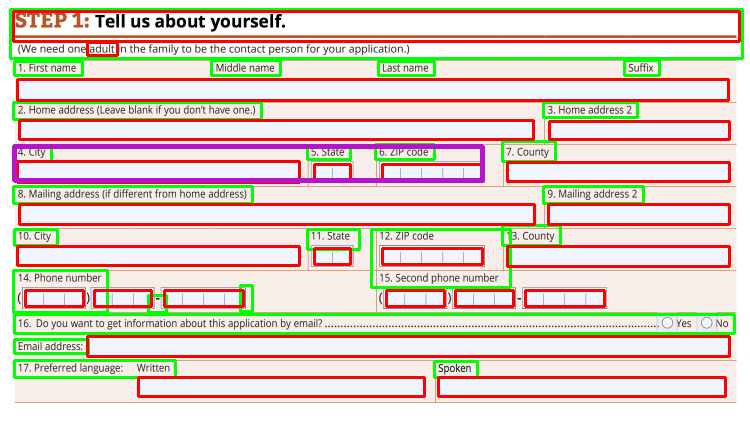

2


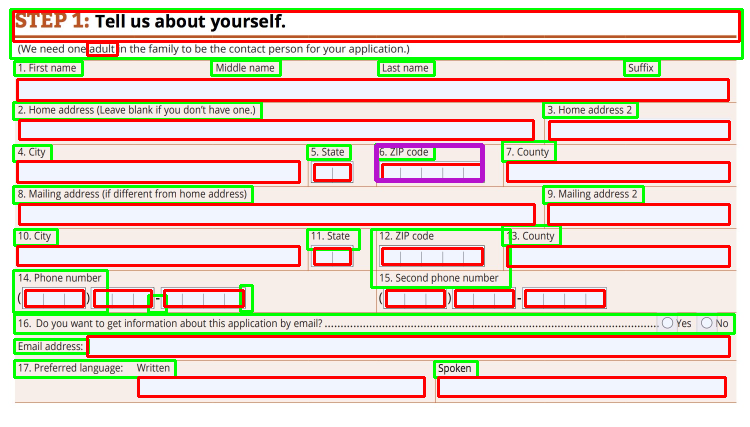

4


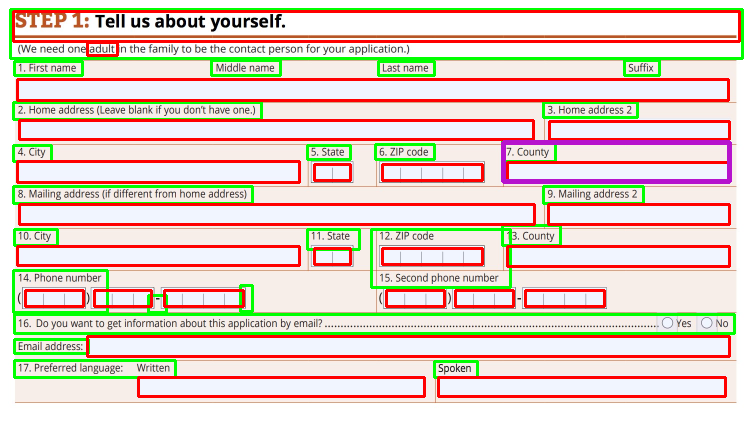

0


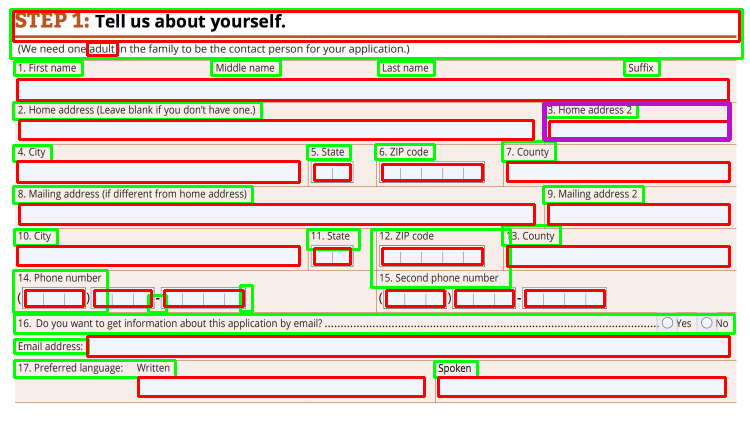

3


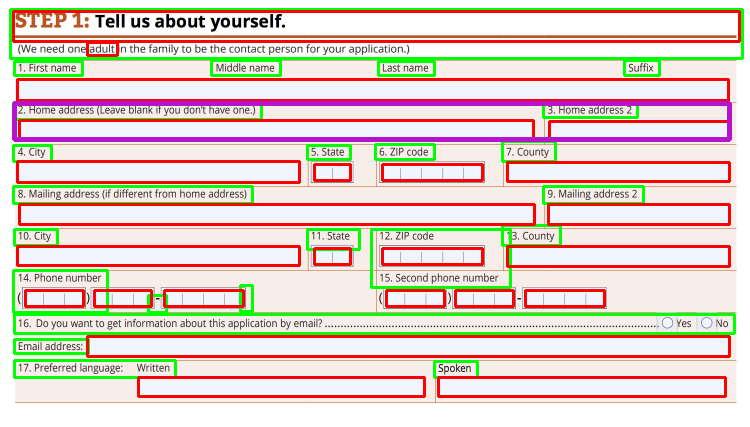

1


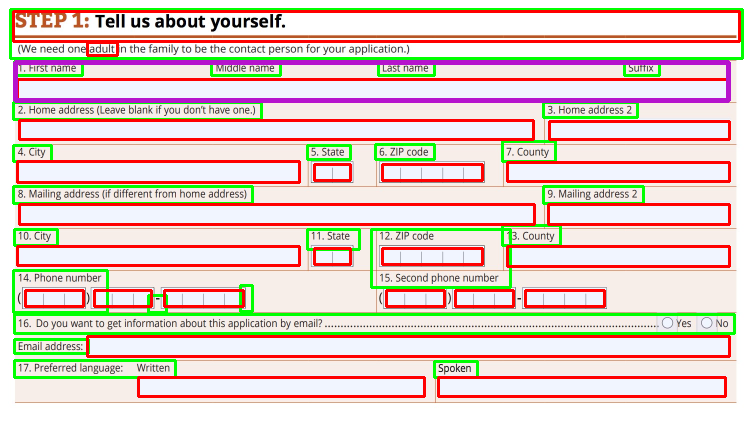

3


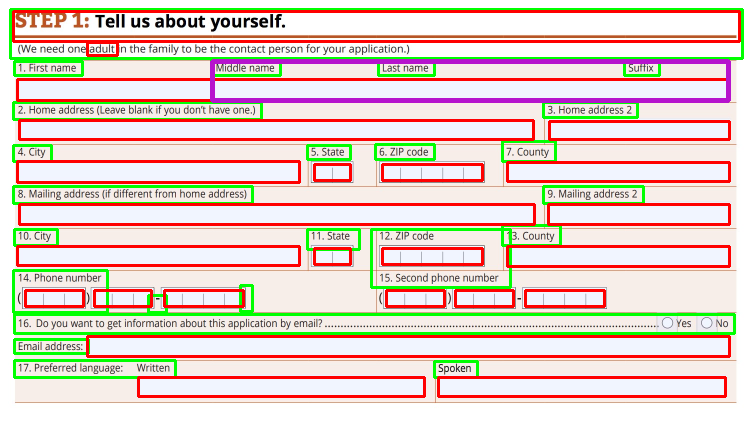

3


In [15]:
#res3=res2.copy()

f=fields.copy()

for a in f:
  (x1,y1,w1,h1)=a.txtrect
  for b in rects:
    (x2,y2,w2,h2)=b
    ar=(x2+w2-x1)*(y2+h2-y1)
    if abs(y2-(y1+h1)) <5 and ar > w2*h2:
      cv2_imshow(cv2.rectangle(res2.copy(),(x1,y1),(x2+w2,y2+h2), (205,19,182), 3))
      a.ftype=textField((x1,y1,x2+w2,y2+h2))
      a.struct["fboundingBox"]=a.ftype.bbox
      print(abs(y2-(y1+h1)))
      break
#cv2_imshow(res3)

In [0]:
for x in f:
  x.printJson()

{
    "ftype": null,
    "ftxt": "STEP 1: Tell us about yourself.\n\n \n\n(We need one adult in the family to be the contact person for your application.)",
    "txtrect": [
        11,
        10,
        732,
        49
    ],
    "fradius": 0,
    "fcenter": [
        -1,
        -1
    ],
    "fboundingBox": [
        -1,
        -1,
        -1,
        -1
    ]
}
{
    "ftype": null,
    "ftxt": "Middle name",
    "txtrect": [
        212,
        61,
        69,
        15
    ],
    "fradius": 0,
    "fcenter": [
        -1,
        -1
    ],
    "fboundingBox": [
        212,
        61,
        728,
        100
    ]
}
{
    "ftype": null,
    "ftxt": "Suffix",
    "txtrect": [
        625,
        61,
        35,
        15
    ],
    "fradius": 0,
    "fcenter": [
        -1,
        -1
    ],
    "fboundingBox": [
        -1,
        -1,
        -1,
        -1
    ]
}
{
    "ftype": null,
    "ftxt": "1. First name",
    "txtrect": [
        15,
        62,
        68,
    